# G01
# Cristina Molina
# Jaime del Rey

# Parte 3: Regresión

## Índice

- [Carga y limpieza](#Carga-y-limpieza)
- [Descripción](#Descripción)
- [Variable objetivo](#Variable-objetivo)
- [Variables correlacionadas](#Variables-correlacionadas)
- [Preparado y pre-procesado](#Preparado-y-pre-procesado)
- [Entrenamiento de MLPs](#Entrenamiento-de-MLPs)
- [Entrenando con el conjunto completo](#Entrenando-con-el-conjunto-completo)
- [Evaluacion de resultados](#Evaluacion-de-resultados)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y limpieza

In [4]:
np.seterr(divide='ignore', invalid='ignore')
cris1 = r"C:\Users\Cristina\Desktop\IA II\Datos\countries.csv"
jaime1 = r"C:\Users\jdrec\Desktop\countries.csv"
carga = pd.read_csv(cris1)
#df[0,0] = "States"
carga.head().transpose()


,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48,124.6,13.8,290.4,152.1
Coastline (coast/area ratio),0,1.26,0.04,58.29,0
Net migration,23.06,-4.93,-0.39,-20.71,6.6
Infant mortality (per 1000 births),163.07,21.52,31,9.27,4.05
GDP (USD per capita),700,4500,6000,8000,19000
Literacy (%),36,86.5,70,97,100


In [5]:
del carga['Region']
countries = carga.dropna()

In [6]:
countries.dropna

<bound method DataFrame.dropna of                 Country  Population  Area (sq. mi.)  \
0          Afghanistan     31056997          647500   
1              Albania      3581655           28748   
2              Algeria     32930091         2381740   
6             Anguilla        13477             102   
7    Antigua & Barbuda        69108             443   
..                  ...         ...             ...   
218          Venezuela     25730435          912050   
219            Vietnam     84402966          329560   
224              Yemen     21456188          527970   
225             Zambia     11502010          752614   
226           Zimbabwe     12236805          390580   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                          48.0                          0.00          23.06   
1                         124.6                          1.26          -4.93   
2                          13.8                          0.04    

In [7]:
countries.transpose()

,0,1,2,6,7,8,9,10,11,12,...,213,214,215,216,217,218,219,224,225,226
Country,Afghanistan,Albania,Algeria,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Population,31056997,3581655,32930091,13477,69108,39921833,2976372,71891,20264082,8192880,...,60609153,298444215,3431932,27307134,208869,25730435,84402966,21456188,11502010,12236805
Area (sq. mi.),647500,28748,2381740,102,443,2766890,29800,193,7686850,83870,...,244820,9631420,176220,447400,12200,912050,329560,527970,752614,390580
Pop. Density (per sq. mi.),48,124.6,13.8,132.1,156,14.4,99.9,372.5,2.6,97.7,...,247.6,31,19.5,61,17.1,28.2,256.1,40.6,15.3,31.3
Coastline (coast/area ratio),0,1.26,0.04,59.8,34.54,0.18,0,35.49,0.34,0,...,5.08,0.21,0.37,0,20.72,0.31,1.05,0.36,0,0
Net migration,23.06,-4.93,-0.39,10.76,-6.15,0.61,-6.47,0,3.98,2,...,2.19,3.41,-0.32,-1.72,0,-0.04,-0.45,0,0,0
Infant mortality (per 1000 births),163.07,21.52,31,21.03,19.46,15.18,23.28,5.89,4.69,4.66,...,5.16,6.5,11.95,71.1,55.16,22.2,25.95,61.5,88.29,67.69
GDP (USD per capita),700,4500,6000,8600,11000,11200,3500,28000,29000,30000,...,27700,37800,12800,1700,2900,4800,2500,800,800,1900
Literacy (%),36,86.5,70,95,89,97.1,98.6,97,100,98,...,99,97,98,99.3,53,93.4,90.3,50.2,80.6,90.7
Phones (per 1000),3.2,71.2,78.1,460,549.9,220.4,195.7,516.1,565.5,452.2,...,543.5,898,291.4,62.9,32.6,140.1,187.7,37.2,8.2,26.8


In [8]:
tipos = pd.DataFrame(data = countries.dtypes, columns = ['Type'])
tipos

,Type
Country,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP (USD per capita),float64
Literacy (%),float64
Phones (per 1000),float64


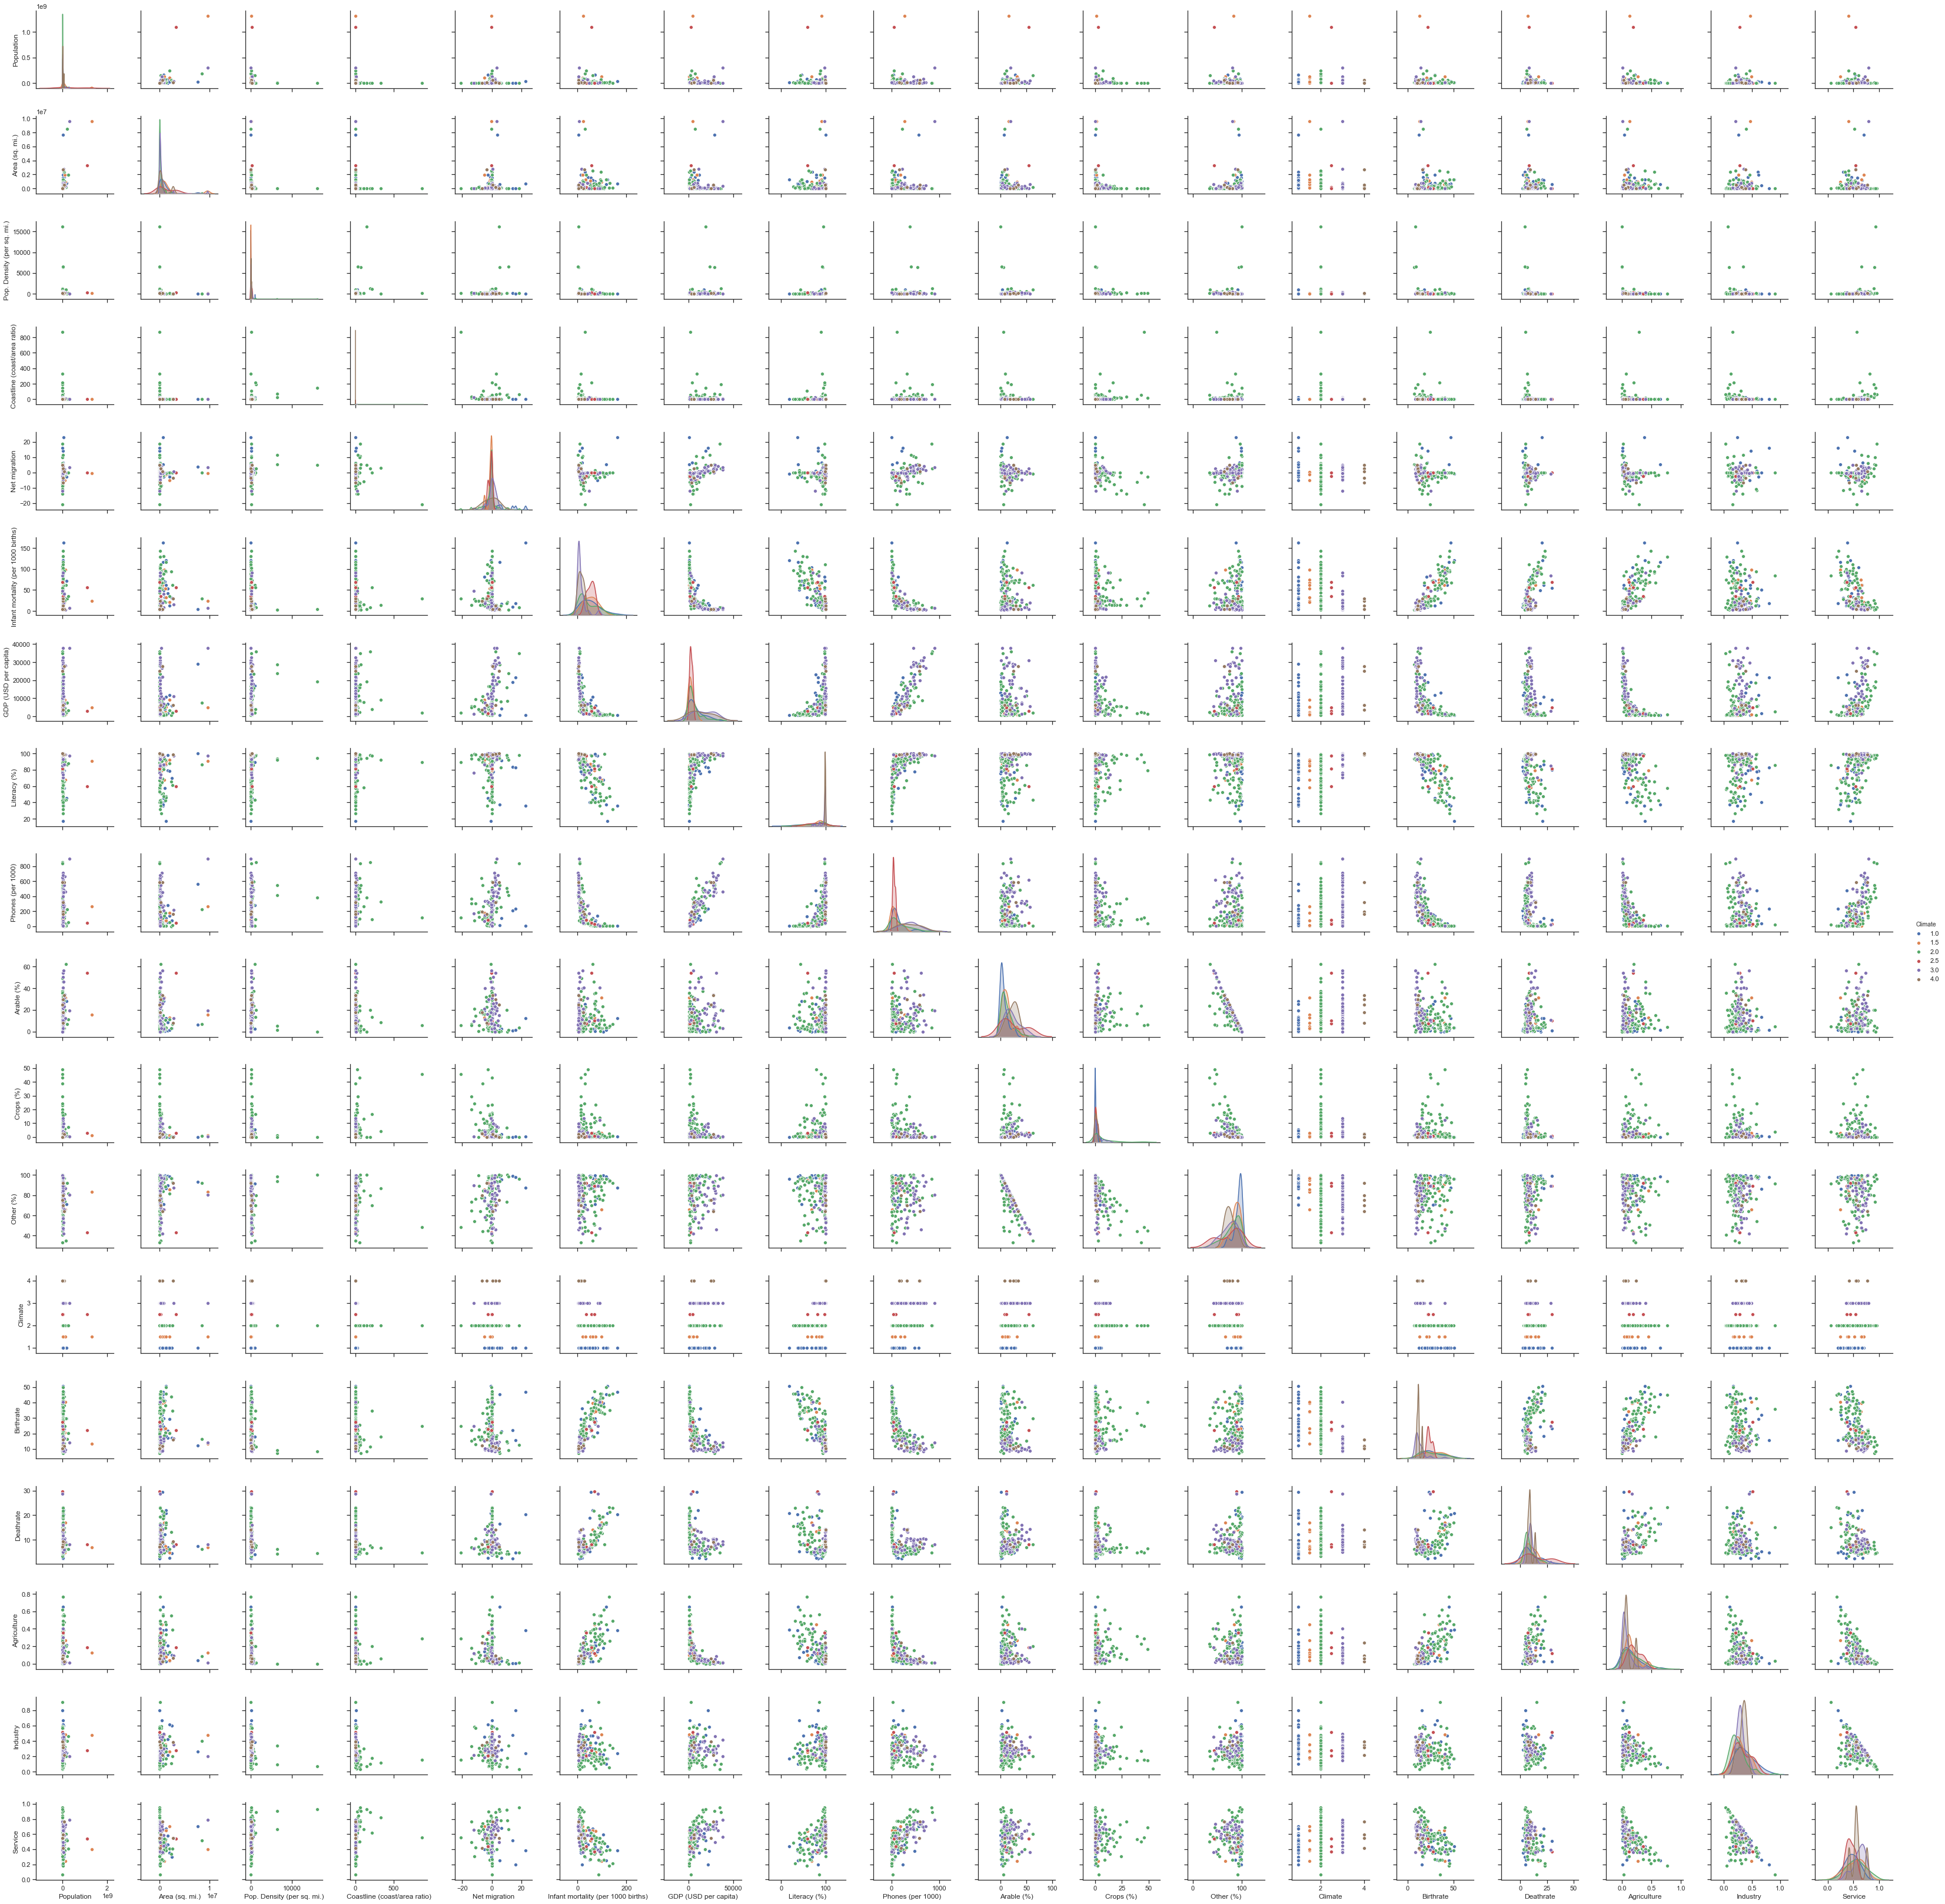

In [9]:
sns.set(style="ticks")
sns.pairplot(countries, hue="Climate")

## Descripción

In [12]:
countries.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,179.0,3.421415e+07,1.317639e+08,13477.000,1.188580e+06,6940432.000,2.086014e+07,1.313974e+09
Area (sq. mi.),179.0,5.641830e+05,1.395657e+06,28.000,1.991500e+04,118480.000,4.964410e+05,9.631420e+06
Pop. Density (per sq. mi.),179.0,2.948050e+02,1.379353e+03,1.800,2.680000e+01,66.900,1.647000e+02,1.618300e+04
Coastline (coast/area ratio),179.0,1.649520e+01,7.397760e+01,0.000,9.000000e-02,0.630,5.355000e+00,8.706600e+02
Net migration,179.0,-2.065363e-01,4.751216e+00,-20.990,-1.315000e+00,0.000,3.950000e-01,2.306000e+01
Infant mortality (per 1000 births),179.0,3.889816e+01,3.535300e+01,2.290,9.990000e+00,24.310,6.460500e+01,1.630700e+02
GDP (USD per capita),179.0,9.125698e+03,9.644123e+03,500.000,1.800000e+03,5100.000,1.295000e+04,3.780000e+04
Literacy (%),179.0,8.194413e+01,1.983754e+01,17.600,6.995000e+01,90.900,9.780000e+01,1.000000e+02
Phones (per 1000),179.0,2.081520e+02,2.101219e+02,0.200,2.710000e+01,137.100,3.350000e+02,8.980000e+02
Arable (%),179.0,1.400045e+01,1.315240e+01,0.000,3.675000e+00,10.530,2.000000e+01,6.211000e+01


In [13]:
(countries['Population'].min(),countries['Population'].max())

(13477, 1313973713)

Observamos que no hay muchos datos y, en general, para cada variable los datos tienen poca variabilidad. La unica excepcion son los datos en Population que fluctuan entre 13477 y 1313973713 con una desviacion tipica de 1.31e+08 (hay datos dispersos con valores extremos). Estando la media en 3.42e+07 (elevada) probablemente sean los paises con menos poblacion los que provoquen una desviacion tipica tan pronunciada.

## Variable objetivo

In [14]:
countries.describe()['GDP (USD per capita)']

count      179.000000
mean      9125.698324
std       9644.123141
min        500.000000
25%       1800.000000
50%       5100.000000
75%      12950.000000
max      37800.000000
Name: GDP (USD per capita), dtype: float64

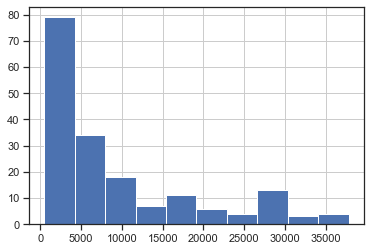

In [15]:
countries['GDP (USD per capita)'].hist()

## Variables correlacionadas

In [16]:
correl = countries.corr()
correl['GDP (USD per capita)']

Population                           -0.033618
Area (sq. mi.)                        0.068356
Pop. Density (per sq. mi.)            0.190122
Coastline (coast/area ratio)          0.035815
Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Arable (%)                            0.046465
Crops (%)                            -0.207844
Other (%)                             0.066445
Climate                               0.360567
Birthrate                            -0.658795
Deathrate                            -0.247562
Agriculture                          -0.616919
Industry                              0.032855
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Estamos buscando las variables mas relacionadas para poder extraer conclusiones en cuanto a si otros factores de los paises en los que se da tienen factores determinantes en comun.
Por ello filtraremos aquellas que, en valor absoluto, no superen el 60% de correlacion. 
Veamos que variables quedan tras aplicar el filtro.

In [17]:
most_related = correl[abs(correl['GDP (USD per capita)']) > 0.6]['GDP (USD per capita)'] 
most_related

Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Name: GDP (USD per capita), dtype: float64

Debido al reducido numero, bajamos el umbral para aportar mas variables para que el Perceptron Multicapa tenga mas ejemplos de entrenamiento.

In [18]:
most_related = correl[abs(correl['GDP (USD per capita)']) > 0.5]['GDP (USD per capita)'] 
most_related

Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Observamos como la variable que mas relacion comparte con la variable objetivo es el ratio de Telefonos/1000 ya que se podria considerar como un articulo de lujo. Ademas, se muestra como a medida que aumenta el nivel adquisitivo de cada ciudadano, lo hace tambien el ratio de alfabetismo, o que el pais dado tiende al sector servicios en el ambito economico (de manera menos pronunciada). <br>
Por otra parte, la Mortalidad infantil o el ratio de Nacimientos aumentan a medida que la variable objetivo disminuye. Parece coinicdir, ademas, con paises cuya principal actividad es la agricultura.

Mostramos la matriz de correlacion entre variables para ver otras posibles correlaciones entre variables no objetivo.

In [19]:
correl.style.background_gradient(cmap='coolwarm')

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1,0.61085,-0.0190105,-0.0546175,0.0103324,0.00243825,-0.0336182,-0.0381618,-0.00394154,0.206667,-0.0625667,-0.137345,-0.0184708,-0.0647189,-0.0505778,-0.00740101,0.0924682,-0.0703196
Area (sq. mi.),0.61085,1,-0.0690105,-0.0881621,0.0527299,0.00292387,0.0683559,0.000682162,0.0778641,-0.0537475,-0.160433,0.124528,-0.0948517,-0.0374726,-0.0242665,-0.0170352,0.103225,-0.0702042
Pop. Density (per sq. mi.),-0.0190105,-0.0690105,1,0.164036,0.161705,-0.143214,0.190122,0.0860897,0.157072,-0.0592226,-0.0365803,0.0667528,-0.01237,-0.174565,-0.130624,-0.144315,-0.14537,0.255477
Coastline (coast/area ratio),-0.0546175,-0.0881621,0.164036,1,-0.241629,-0.105956,0.0358152,0.099605,0.0983668,-0.0778002,0.399358,-0.137085,-0.0270632,-0.0634642,-0.148592,-0.0323272,-0.188972,0.190004
Net migration,0.0103324,0.0527299,0.161705,-0.241629,1,0.0130531,0.37879,-0.0537879,0.232446,-0.0658463,-0.405355,0.25742,-0.0704133,-0.0351016,0.042805,-0.0966175,-0.00440231,0.0914977
Infant mortality (per 1000 births),0.00243825,0.00292387,-0.143214,-0.105956,0.0130531,1,-0.63909,-0.761224,-0.699199,-0.123033,-0.0957116,0.1486,-0.366672,0.862113,0.665729,0.758537,-0.0853104,-0.618259
GDP (USD per capita),-0.0336182,0.0683559,0.190122,0.0358152,0.37879,-0.63909,1,0.52288,0.88352,0.0464647,-0.207844,0.0664453,0.360567,-0.658795,-0.247562,-0.616919,0.0328546,0.536551
Literacy (%),-0.0381618,0.000682162,0.0860897,0.099605,-0.0537879,-0.761224,0.52288,1,0.592042,0.0865191,0.0607407,-0.101167,0.395194,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Phones (per 1000),-0.00394154,0.0778641,0.157072,0.0983668,0.232446,-0.699199,0.88352,0.592042,1,0.124116,-0.124819,-0.0386432,0.410691,-0.732985,-0.31753,-0.631578,-0.0842474,0.649638
Arable (%),0.206667,-0.0537475,-0.0592226,-0.0778002,-0.0658463,-0.123033,0.0464647,0.0865191,0.124116,1,0.098265,-0.866058,0.392914,-0.198438,0.0477705,-0.0186097,-0.07338,0.081982


Se muestra una correlacion positiva bastante elevada entre las variables Agricultura y Mortalidad infantil, esto muy posiblemente indique que paises cuyo principal ejercicio economico este destinado a la agricultura tenga ingresos bajos que impidan una sanidad destinada al sector infantil desarrollada. <br>
Por ejemplo, entre Servicios y Mortalidad infantil hay una correlacion de **-0.61** indicandonos que aquellos paises con un gran desarrollo en el sector servicios cuentan con unos numeros de Mortalidad infantil bajos.

Encontramos tambien una correlacion pronunciada, negativa en este caso, entre Mortalidad infantil y Moviles por cada 1000 lo cual parece indicar que ,mayormente, es el sector infantil un consumidor con peso en lo que respecta a moviles(tecnologia).

Resulta curioso ver como el Ratio de nacimientos y el de Alfabetismo comparten una correlacion de **-0.65**.

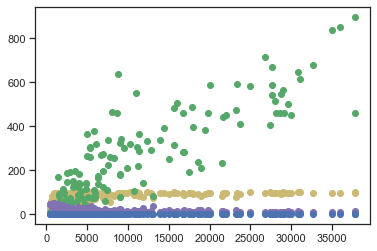

In [20]:
#grafico de dispersion mostrando como afecta la correlacion a los valores
plt.plot(countries[most_related.keys()[1]],countries[most_related.keys()[2]], 'oy'
         , countries[most_related.keys()[1]],countries[most_related.keys()[3]], 'og'
        , countries[most_related.keys()[1]],countries[most_related.keys()[4]], 'om'
        , countries[most_related.keys()[1]],countries[most_related.keys()[5]], 'ob')

Aqui representamos la relacion de GPD con las variables con las que comparte mas relacion (positiva o negativa).

- En **verde** la variable con mayor correlacion positiva: Telefonos por 1000 habitantes.<br>
- En **amarillo** vemos como el Alfabetismo crece parejo a la variable objetivo.

- En **rosa** y **azul** respectivamente se representa la relacion con Ratio de nacimientos y Agricultura respectivamente. Al estar inversamente relacionadas, los valores de las mismas acaban en 0 a medida que el GPD va aumentando ya que estas disminuyen.

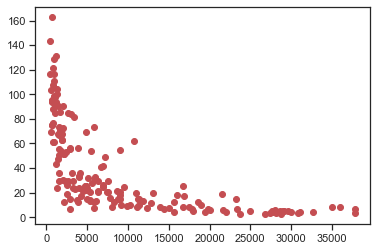

In [21]:
plt.plot(countries['GDP (USD per capita)'],countries['Infant mortality (per 1000 births)'], 'or')

Es curioso ver de todas maneras como ,en concreto, al representar su relacion con la Mortalidad infantil se ve algun pico en valores extremos para GPD.

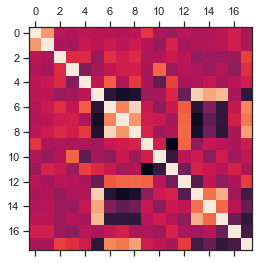

In [22]:
#matriz de correlaciones
plt.matshow(countries.corr())
plt.show()

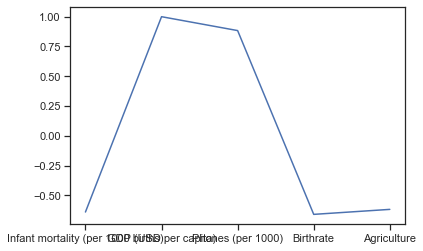

In [23]:
#grafico lineal de correlaciones
plt.plot(correl[abs(correl['GDP (USD per capita)']) > 0.6]['GDP (USD per capita)'])

In [24]:
phones = countries[most_related.keys()[2]].values.tolist()
infnt_mortality = countries[most_related.keys()[0]].values.tolist()
gpd = countries[most_related.keys()[1]].values.tolist()
phones.sort()
infnt_mortality.sort()
gpd.sort()

## Preparado y pre-procesado

Podemos observar que no todas las variables comparten la misma unidad de medida: el _Area_ y la _Densidad de poblacion_ vienen dados en millas$^2$,el _Alfabetismo_ o _Cultivo_ vienen en porcentaje.<br>
Por esto, decidimos normalizar las variables que han pasado el filtro para que sean tratadas de manera equivalente por el perceptron multicapa (evitamos minimos locales). Otra ventaja que encontraremos sera que los tiempos de entrenamiento se veran reducidos. 

In [25]:
#quitamos la fila con todos los paises (son categorias, no valores)
row_countries = countries['Country']
del countries['Country']
variable_obj = np.array(countries['GDP (USD per capita)'])
variables_entrada = countries[['GDP (USD per capita)','Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture']]

In [26]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(variables_entrada)
vars_scaled=scaler_x.transform(variables_entrada)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
#hay que convertir a np.array para poder aplicar la funcion reshape
scaler_y.fit(np.array(countries['GDP (USD per capita)']).reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(np.array(countries['GDP (USD per capita)']).reshape(-1, 1))

## Entrenamiento de MLPs

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

## Primer MLP

In [28]:
regul_param_range = 10.0 ** -np.arange(1, 9) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.05, max_iter=250, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, vars_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    

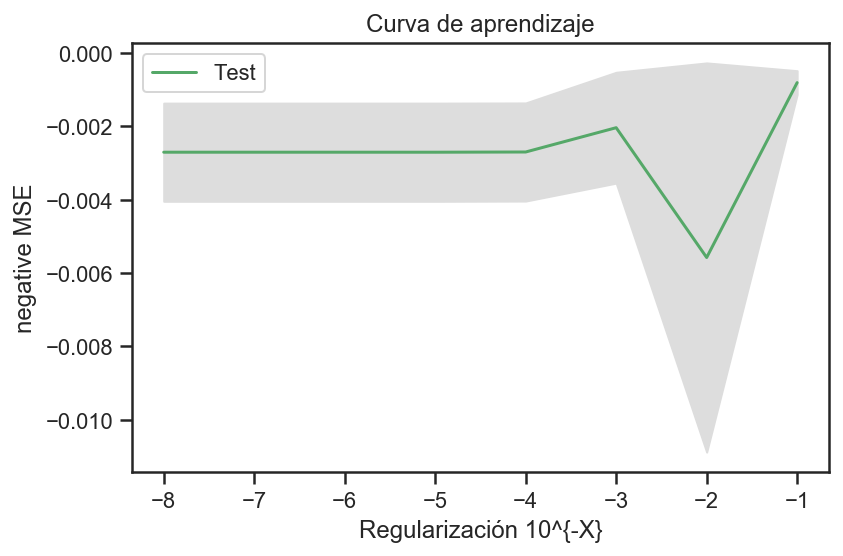

In [29]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.001
######################################################

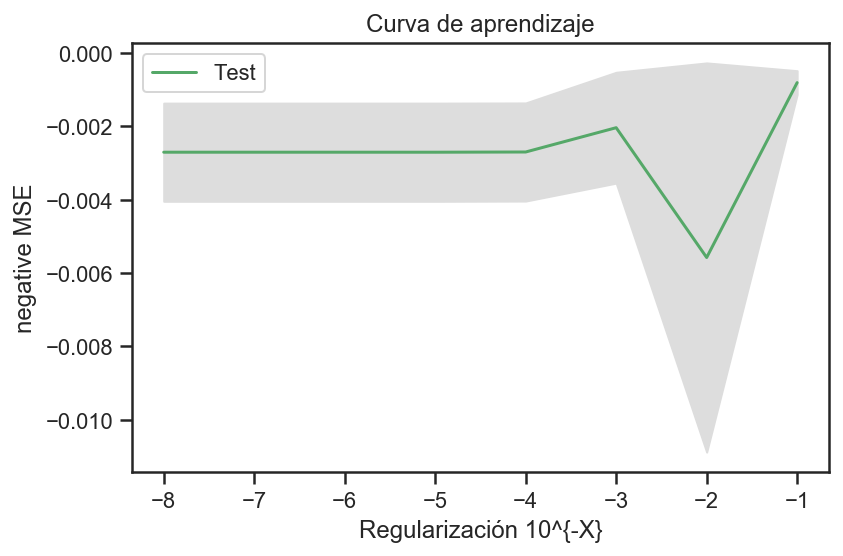

In [30]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.005
######################################################

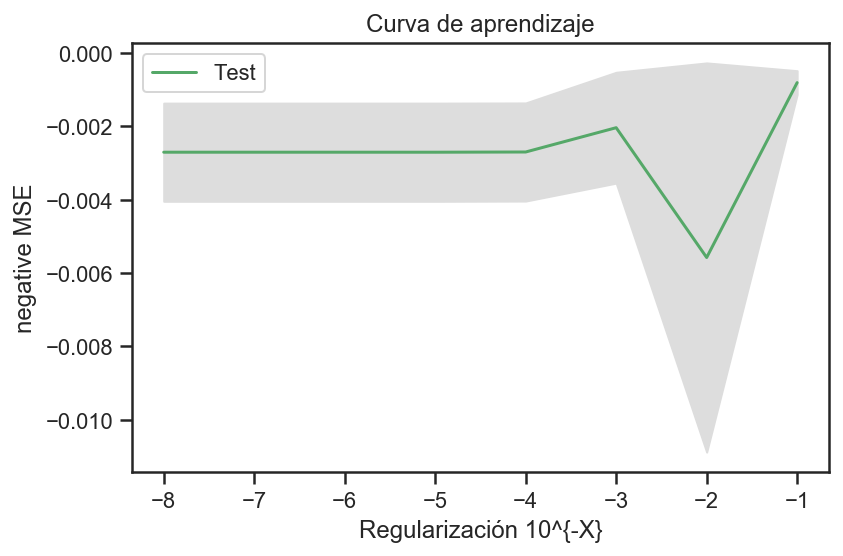

In [31]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.01
######################################################

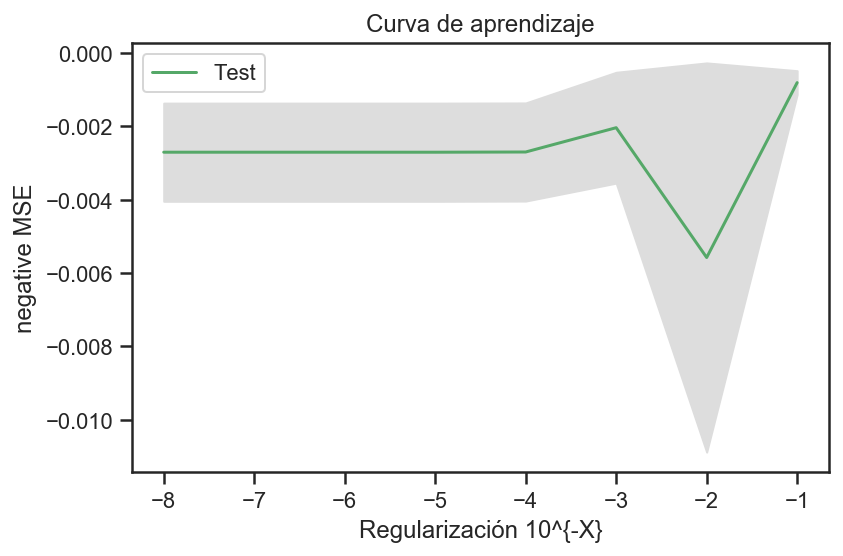

In [32]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.05
######################################################

Vemos las distintas curvas de aprendizaje para distintas tasas de aprendizaje. <br>
La mas prometedora es aquella con mayor tasa de aprendizaje: 0.05, sin embargo vemos que si bien para el parametro de regularizacion en 0.01 las predicciones son bastante acertadas, para 0.1 esta sobreaprendiendo. Mostremos la distribucion del error para cada caso y veamos las diferencias.

La segunda mas prometedora tiene una tasa de aprendizaje de 0.005 y el parametro de regulacion que mas reduce el error es 0.1. Mostramos la distribucion del error.

## Segundo MLP

In [33]:
regul_param_range = 10.0 ** -np.arange(1, 9) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=250, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, vars_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    

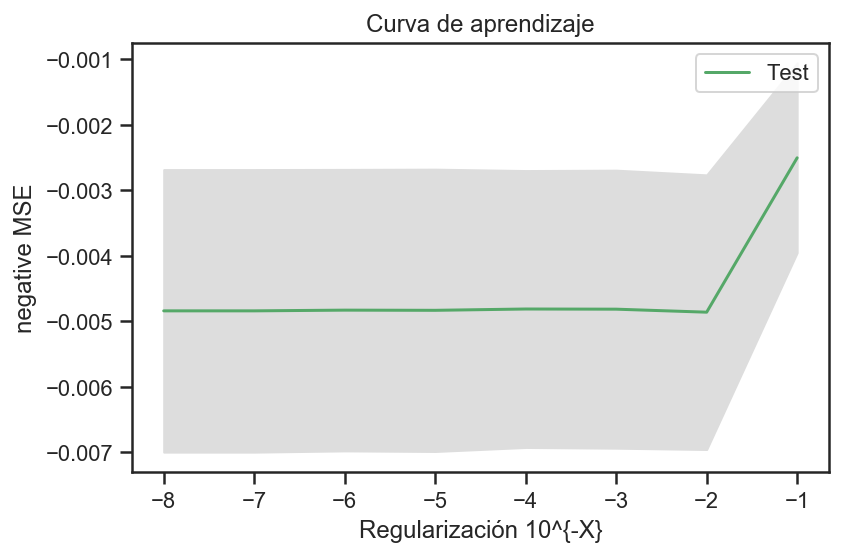

In [34]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.001
######################################################

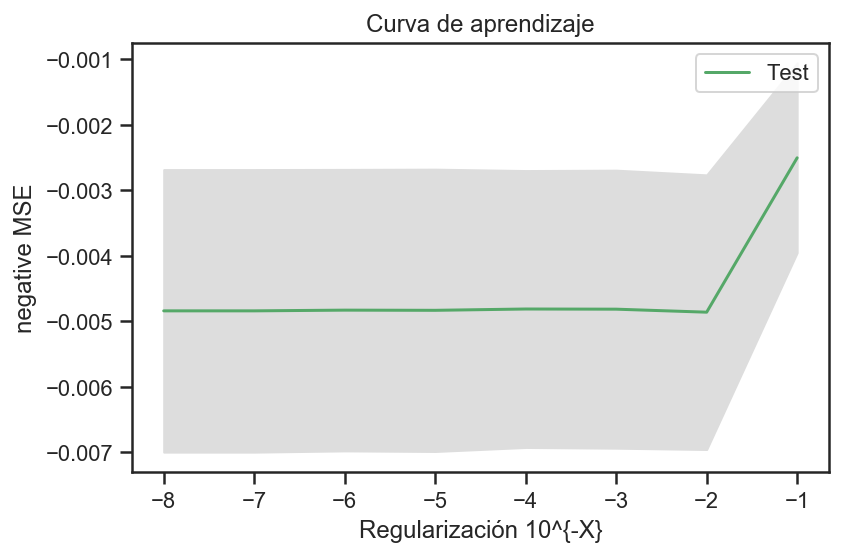

In [35]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.005
######################################################

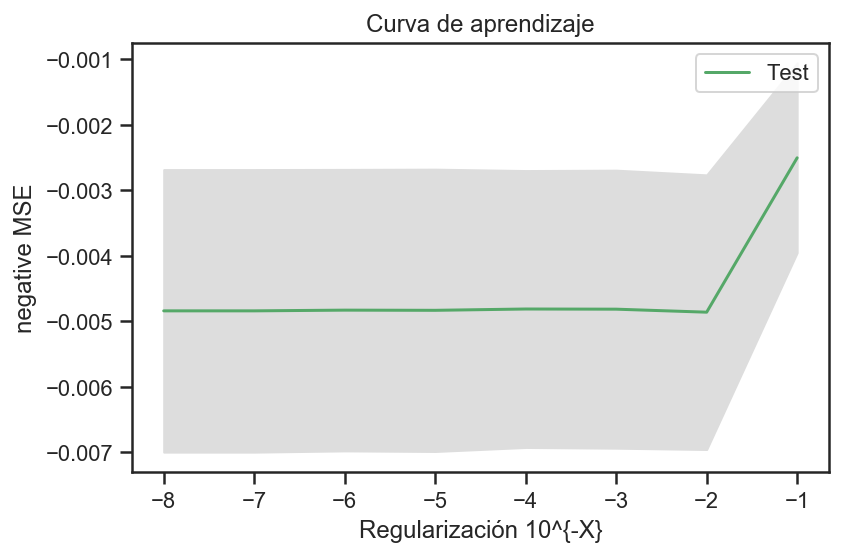

In [36]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.01
######################################################

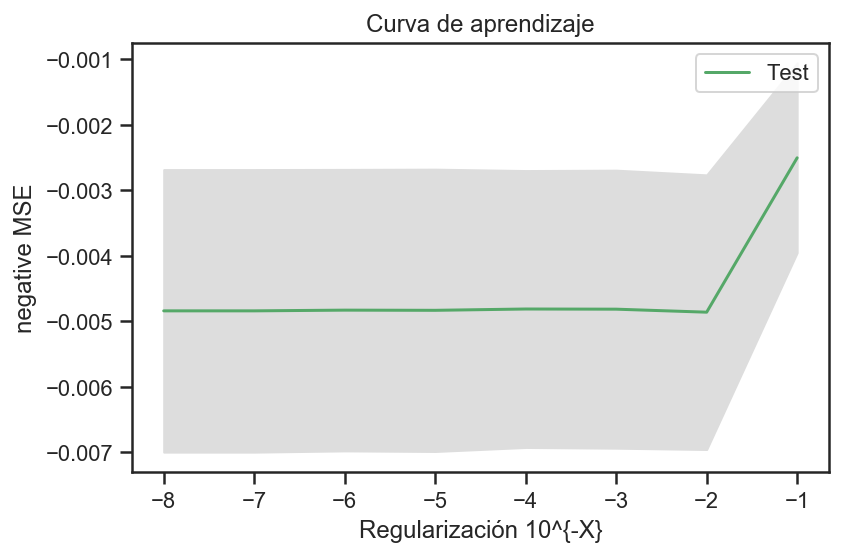

In [37]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.05
######################################################

# Entrenando con el conjunto completo

Claramente el segundo perceptron multicapa es superior en aprendizaje: podemos observar como en cada caso, la 

In [38]:
from sklearn.preprocessing import StandardScaler
variables_entrada = countries
# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(variables_entrada)
vars_scaled=scaler_x.transform(variables_entrada)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
#hay que convertir a np.array para poder aplicar la funcion reshape
scaler_y.fit(np.array(countries['GDP (USD per capita)']).reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(np.array(countries['GDP (USD per capita)']).reshape(-1, 1))

In [39]:
regul_param_range = 10.0 ** -np.arange(1, 9) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.01, max_iter=250, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, vars_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    

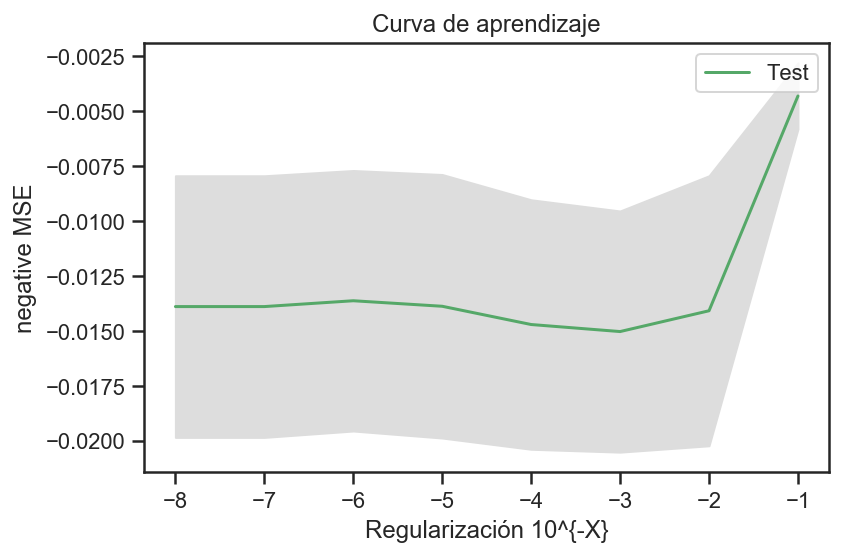

In [40]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######################################################
# learning_rate = 0.01
######################################################

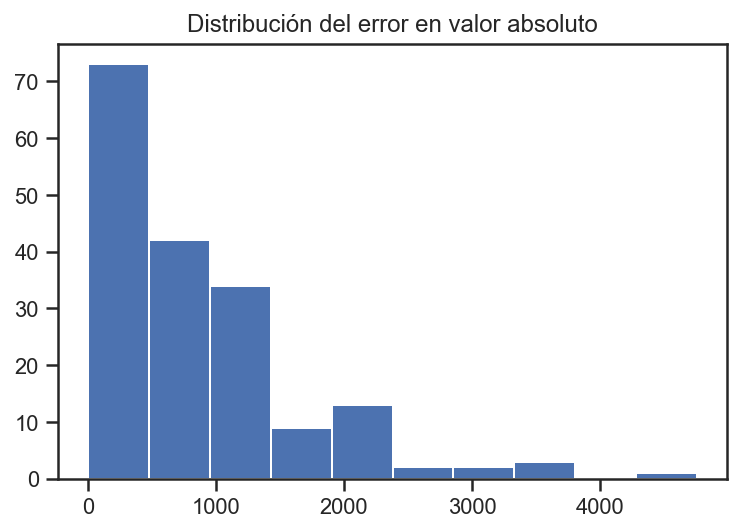

In [41]:
from sklearn.model_selection import cross_val_predict


regul_param=10**-3

mlp=MLPRegressor(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.01, max_iter=250, random_state=333)
    

predicts_scaled = cross_val_predict(mlp, vars_scaled, target_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

# Dibujamos el histograma de los errores
%config InlineBackend.figure_format ='retina'
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(variable_obj - predicts))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

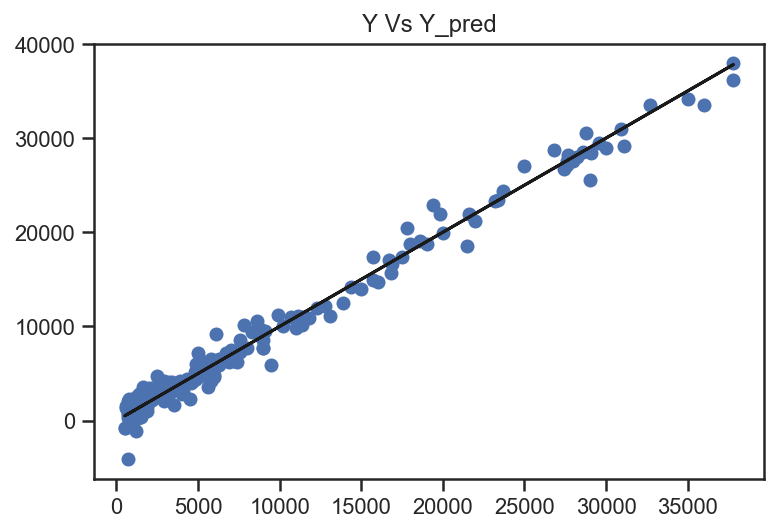

In [42]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(variable_obj, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(variable_obj, variable_obj, color='k') 
%config InlineBackend.figure_format ='retina'
plt.title('Y Vs Y_pred')
plt.show()

## Evaluacion de resultados

El pais que mas llama la atencion _a priori_ es Afghanistan, que esta tan separado de el resto de predicciones y de su valor real. Vamos a comparar si alguna de las variables que tenian un mayor indice de correlacion con la variable objetivo desentona con los valores medios.<br>
Despues, comprobaremos las zonas entre **[15500, 20500]** y **[25000, 30500]** por tener predicciones mas separadas de su valor real; y los ultimos paises, cuya prediccion parece discernir del valor real.

In [43]:
# Afghanistan
predicts[0]

-4055.2079458392454

In [44]:
countries.loc[[0]]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.0,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38


Resula llamativo como el numero de **Telefonos/1000 esta mas de 200 por debajo de la media**, varaible que tenia un indice correlacion de 0.8, mostrado en . Por otra parte el **Indice de mortalidad infantil es el mas alto**. Viendo que la variable que mas le aporta esta tan baja y aquella que mas le resta es tan elevada, podemos explicar una prediccion tan infraestimada.<br>
Podemos recordar los indices de correlacion en el apartado de [Variables correlacionadas](#Variables-correlacionadas), asi como ver la tabla de descriptivos estadisticos en [Descriptivos](#Descriptivos).

In [45]:
#Df con los paises, Y e Y_pred
a = np.array(variable_obj)
b = np.array(predicts)
c = np.array(row_countries)
final = pd.DataFrame(data = (c,a,b)).transpose().rename(columns={0:"Country",1:"Y",2:"Y_pred"})

In [46]:
final

,Country,Y,Y_pred
0,Afghanistan,700,-4055.21
1,Albania,4500,2300.28
2,Algeria,6000,4801.42
3,Anguilla,8600,10612.3
4,Antigua & Barbuda,11000,9805.98
...,...,...,...
174,Venezuela,4800,5188.86
175,Vietnam,2500,4706.44
176,Yemen,800,1424.95
177,Zambia,800,890.562


In [47]:
#Rango de 15500 a 20500
final.sort_values(by='Y',ascending=False).loc[(final['Y_pred']>=15500)& (final['Y_pred'] < 20500)]

,Country,Y,Y_pred
133,Qatar,21500,18535.8
67,Greece,20000,19908
92,Kuwait,19000,18786.2
25,Brunei,18600,19063.7
131,Portugal,18000,18723.9
91,Korea. South,17800,20477.4
61,French Polynesia,17500,17346.7
12,Bahrain,16900,16638.6
132,Puerto Rico,16800,15677.1
11,Bahamas. The,16700,17021.7


In [48]:
#Rango de 25000 a 30500
final.sort_values(by='Y',ascending=False).loc[(final['Y_pred']>=25000)& (final['Y_pred'] < 30500)]

,Country,Y,Y_pred
46,Denmark,31100,29125.8
9,Austria,30000,28915
83,Ireland,29600,29482.4
16,Belgium,29100,28442.2
8,Australia,29000,25515.2
114,Netherlands,28600,28537.4
86,Japan,28200,27981.6
7,Aruba,28000,27547.6
169,United Kingdom,27700,28231.8
65,Germany,27600,27594.7


In [49]:
final.sort_values(by='Y',ascending=False).head(10)

,Country,Y,Y_pred
121,Norway,37800,36151.2
170,United States,37800,37919.1
19,Bermuda,36000,33461.4
33,Cayman Islands,35000,34183.7
155,Switzerland,32700,33534.1
46,Denmark,31100,29125.8
78,Iceland,30900,31015.1
9,Austria,30000,28915
83,Ireland,29600,29482.4
16,Belgium,29100,28442.2


Los mas llamativos son Bermuda, Qatar, Korea. South y Australia, que cuentan con una diferencia en torno a 3000 como mostramos a continuacion.

In [50]:
final.loc[final['Y'].isin([36000,29000,21500,17800])]

,Country,Y,Y_pred
8,Australia,29000,25515.2
19,Bermuda,36000,33461.4
91,Korea. South,17800,20477.4
133,Qatar,21500,18535.8


In [51]:
countries.loc[countries['GDP (USD per capita)'].isin([36000,29000,21500,17800])]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
11,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
22,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
110,48846823,98480,496.0,2.45,0.00,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.00,5.85,0.033,0.403,0.563
166,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197


En general estos paises cuentan con un nivel de **Alfabetismo** por encima de la media y un ratio de **Telefonos/1000** muy por encima de la media, lo que deberia sobreestimar la prediccion. Veremos si algun otro factor penaliza.<br> Tanto Bermuda como Australia cuentan con un alto porcentaje de sector **Servicios** que tambien les favorece en la prediccion de un valor elevado pero Bermuda cuenta con una **Densidad de poblacion** infima y Australia con una poblacion algo elevada que ambos penalizan levemente.

En conclusion, creemos que las predicciones estan en general bien fundamentadas en base al resto de variables, aunque en algun caso concreto como Bermuda o Korea del Sur no encontremos un factor tan determinante como para que haya una diferencia tan grande entre el valor estimado y el valor real; probablemente causa de un aprendizaje erroneo en el perceptron multiplaca. 